In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv")

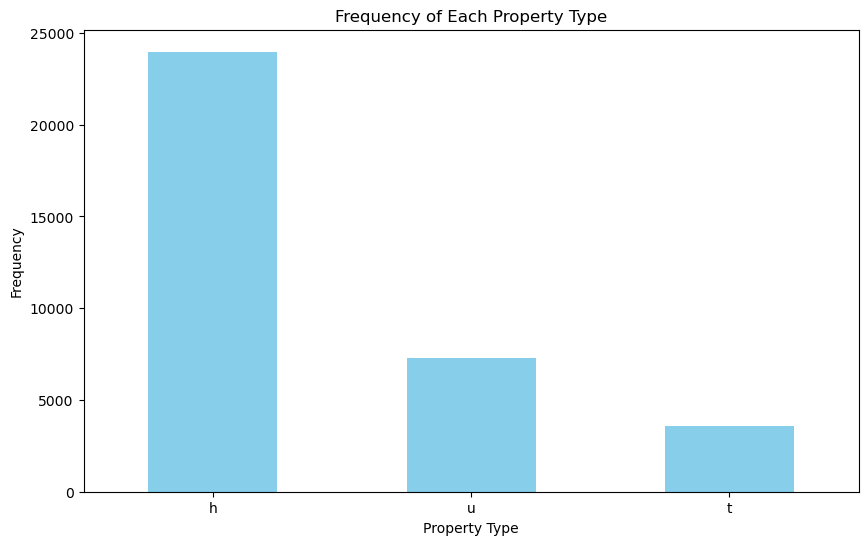

In [3]:
# 3

import pandas as pd
import matplotlib.pyplot as plt



property_counts = df['Type'].value_counts()


property_counts = property_counts.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
property_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



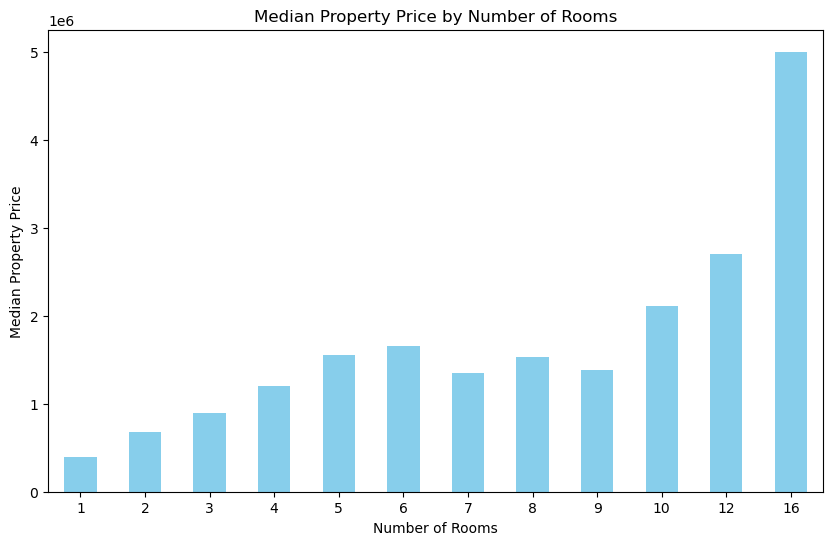

In [4]:
# 4

median_prices = df.groupby('Rooms')['Price'].median()

plt.figure(figsize=(10, 6))
median_prices.plot(kind='bar', color='skyblue')
plt.title('Median Property Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Property Price')
plt.xticks(rotation=0)
plt.show()

In [5]:
# 5

from scipy.stats import spearmanr


# Drop rows with missing values in the 'Price' or 'Rooms' columns
df = df.dropna(subset=['Price', 'Rooms'])

# Calculate the Spearman correlation coefficient
corr, _ = spearmanr(df['Rooms'], df['Price'])
corr

0.5042971590926004

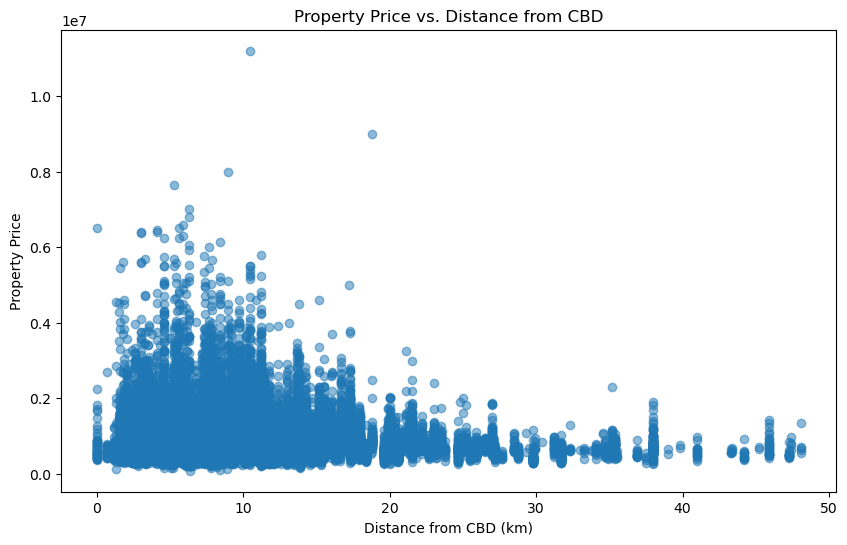

-0.21138434279157906

In [7]:
# 6

from scipy.stats import pearsonr

df = df.dropna(subset=['Price', 'Distance'])


plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Price'], alpha=0.5)
plt.title('Property Price vs. Distance from CBD')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Property Price')
plt.show()


corr, _ = pearsonr(df['Distance'], df['Price'])
corr

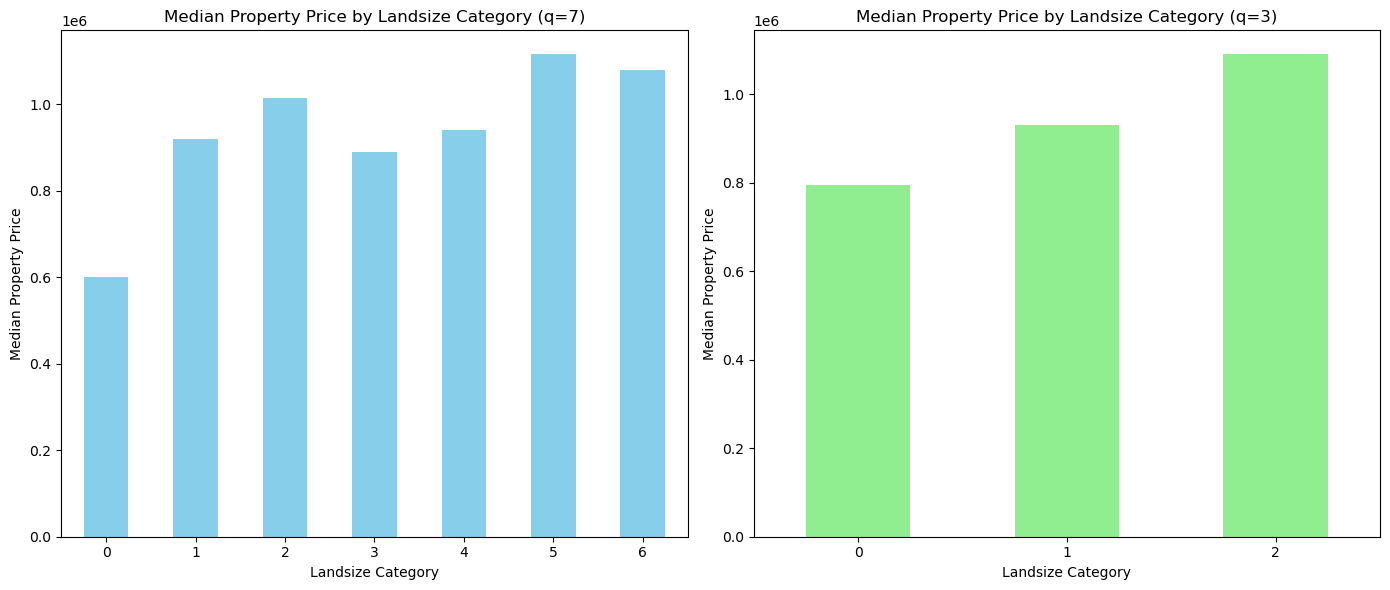

In [8]:
# 8

# Drop rows with missing values in the 'Price' or 'Landsize' columns
df = df.dropna(subset=['Price', 'Landsize'])

# Use quantile-based discretization to categorize the Landsize variable
df['Landsize_Category_q7'] = pd.qcut(df['Landsize'], q=7, labels=False)
df['Landsize_Category_q3'] = pd.qcut(df['Landsize'], q=3, labels=False)

# Calculate median property price for each Landsize category
median_price_q7 = df.groupby('Landsize_Category_q7')['Price'].median()
median_price_q3 = df.groupby('Landsize_Category_q3')['Price'].median()

# Create bar plots to visualize the relationship
plt.figure(figsize=(14, 6))

# Bar plot for q=7
plt.subplot(1, 2, 1)
median_price_q7.plot(kind='bar', color='skyblue')
plt.title('Median Property Price by Landsize Category (q=7)')
plt.xlabel('Landsize Category')
plt.ylabel('Median Property Price')
plt.xticks(rotation=0)

# Bar plot for q=3
plt.subplot(1, 2, 2)
median_price_q3.plot(kind='bar', color='lightgreen')
plt.title('Median Property Price by Landsize Category (q=3)')
plt.xlabel('Landsize Category')
plt.ylabel('Median Property Price')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [9]:
#9

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]


percentage_outliers = (len(outliers) / len(df)) * 100
percentage_outliers

4.487821154487821

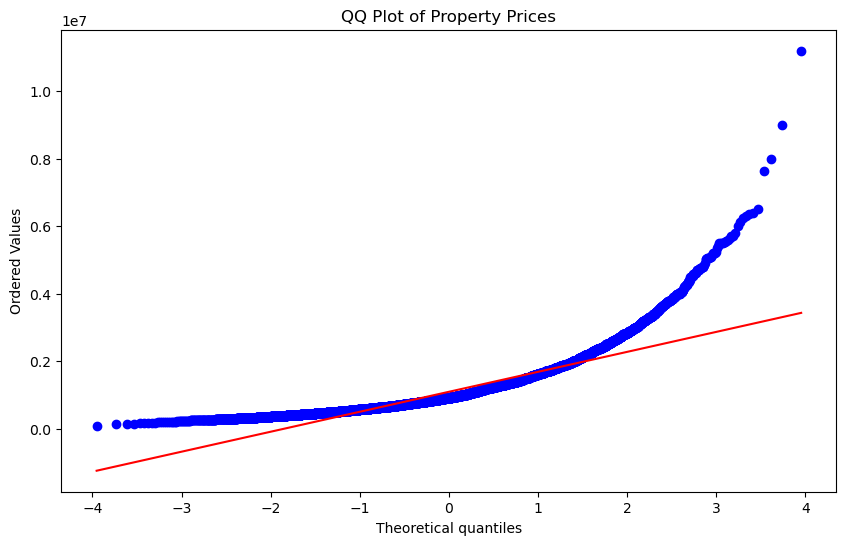

Skewness: 2.4370412582639838
Kurtosis: 12.507376673867142


In [12]:
#10
import scipy.stats as stats

# Drop rows with missing values in the 'Price' column
df = df.dropna(subset=['Price'])

# Create a QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title('QQ Plot of Property Prices')
plt.show()

# Calculate skewness and kurtosis
skewness = df['Price'].skew()
kurtosis = df['Price'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

In [13]:
#11
from scipy.stats import kstest

kstest_result = kstest(df['Price'], 'norm', args=(df['Price'].mean(), df['Price'].std()))
kstest_result

KstestResult(statistic=0.12733997842741857, pvalue=1.1956945982601677e-254, statistic_location=1010000.0, statistic_sign=1)

<Figure size 1200x600 with 0 Axes>

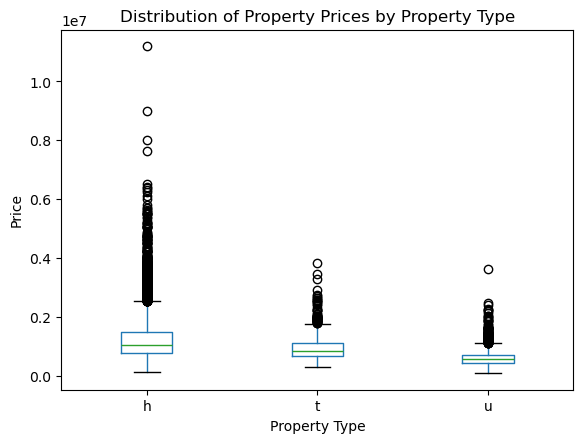

In [14]:
#12
df = df.dropna(subset=['Price', 'Type'])

# Create a box plot to show the distribution of property prices for each property type
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='Type', grid=False)
plt.title('Distribution of Property Prices by Property Type')
plt.suptitle('')  # Suppress the default title to only show our custom title
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()



In [15]:
# 13

df = df.dropna(subset=['Price', 'Regionname'])

median_prices_by_region = df.groupby('Regionname')['Price'].median()

highest_median_price_region = median_prices_by_region.idxmax()
lowest_median_price_region = median_prices_by_region.idxmin()

highest_median_price_region, lowest_median_price_region

('Southern Metropolitan', 'Western Victoria')

In [17]:
#14
from scipy.stats import chi2_contingency
import numpy as np

price_bins = pd.qcut(df['Price'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Price_Category'] = price_bins

contingency_table = pd.crosstab(df['Regionname'], df['Price_Category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = np.sum(contingency_table.values)
min_dimension = min(contingency_table.shape) - 1
cramers_v = np.sqrt((chi2 / n) / min_dimension)

chi2, p, cramers_v


(4048.9717081403946, 0.0, 0.23725937321588664)

In [19]:
#15
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year

earliest_year = df['Year'].min()
latest_year = df['Year'].max()

median_price_earliest_year = df[df['Year'] == earliest_year]['Price'].median()
median_price_latest_year = df[df['Year'] == latest_year]['Price'].median()

percentage_change = ((median_price_latest_year - median_price_earliest_year) / median_price_earliest_year) * 100

median_price_earliest_year, median_price_latest_year, percentage_change

(900000.0, 958000.0, 6.444444444444445)